In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We define each of labels directory:

In [2]:
import os

# Directory with our Bacterial Leaf Blight pictures
train_bacterial_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Bacterial Leaf Blight')

# Directory with our Brown Spot pictures
train_brown_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Brown Spot')

# Directory with our Leaf Smut pictures
train_leaf_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train/Leaf Smut')

Now we see what the filenames look like in the `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` directories:

In [3]:
train_bacterial_names = os.listdir(train_bacterial_dir)
print("File names in Bacterial Leaf Blight directory:")
print(train_bacterial_names[:10])

train_brown_names = os.listdir(train_brown_dir)
print("\nFile names in Brown Spot directory:")
print(train_brown_names[:10])

train_leaf_names = os.listdir(train_leaf_dir)
print("\nFile names in Leaf Smut directory:")
print(train_leaf_names[:10])

File names in Bacterial Leaf Blight directory:
['DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0365.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0382.JPG', 'DSC_0383.JPG', 'DSC_0703.JPG']

File names in Brown Spot directory:
['DSC_0299.JPG', 'DSC_0302.JPG', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0303.JPG', 'DSC_0304.JPG', 'DSC_0305.JPG', 'DSC_0306.JPG', 'DSC_0323.JPG', 'DSC_0325.JPG']

File names in Leaf Smut directory:
['DSC_0508.jpg', 'DSC_0309.JPG', 'DSC_0316.JPG', 'DSC_0327.JPG', 'DSC_0331.JPG', 'DSC_0293.JPG', 'DSC_0310.JPG', 'DSC_0317.JPG', 'DSC_0335.JPG', 'DSC_0322.jpg']


We can also find out the total number of `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` images in the directories:

In [4]:
print('total Bacterial Leaf Blight images:', len(os.listdir(train_bacterial_dir)))
print('total Brown Spot images:', len(os.listdir(train_brown_dir)))
print('total Leaf Smut images:', len(os.listdir(train_leaf_dir)))

total Bacterial Leaf Blight images: 32
total Brown Spot images: 32
total Leaf Smut images: 32


# **Data Visualization**

Now we take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 3
ncols = 3

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 each disease pictures. We can rerun the cell to see a fresh batch each time:

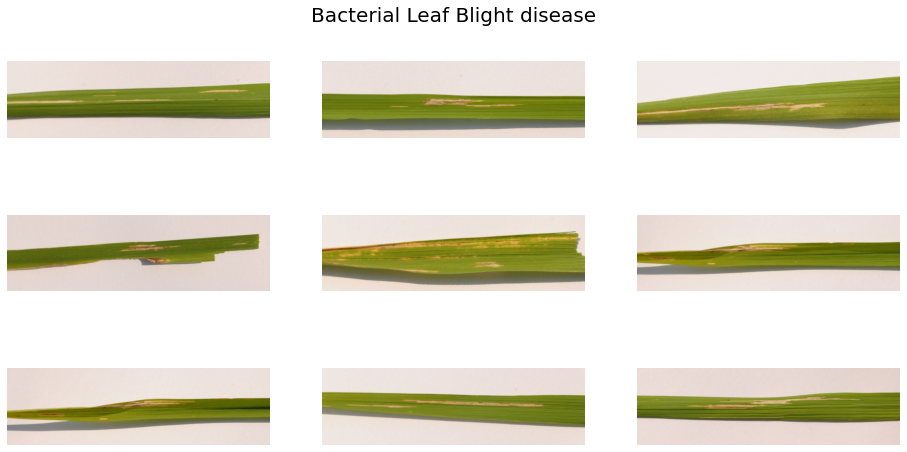

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
                for fname in train_bacterial_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_bacterial_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Bacterial Leaf Blight disease", pad = 40, fontsize = 20)

plt.show()

In [7]:
pic_index = 0

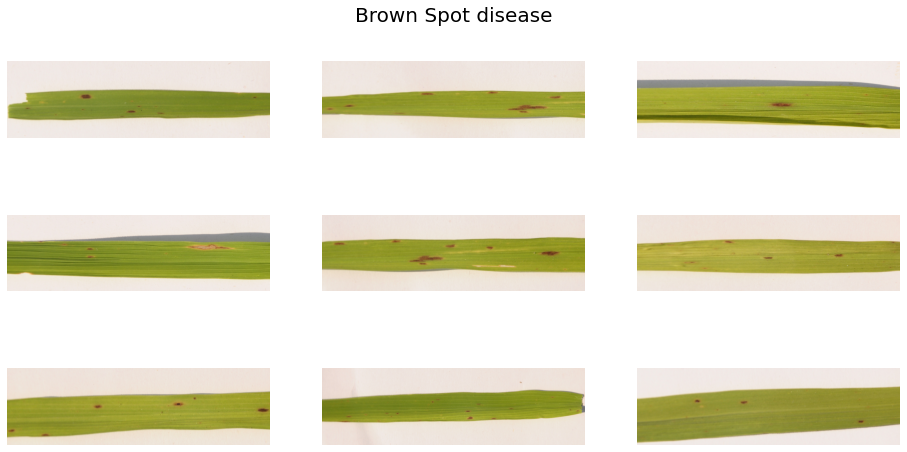

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_brown_pix = [os.path.join(train_brown_dir, fname) 
                for fname in train_brown_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_brown_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Brown Spot disease", pad = 40, fontsize = 20)

plt.show()

In [9]:
pic_index = 0

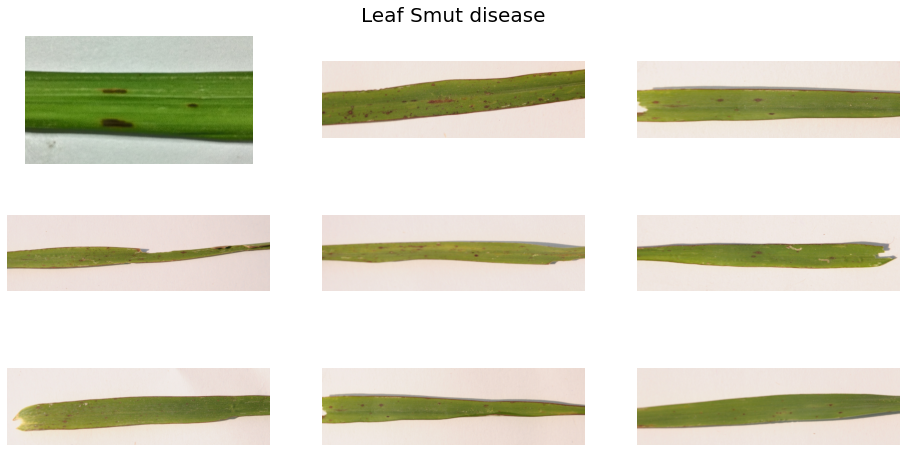

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_leaf_pix = [os.path.join(train_leaf_dir, fname) 
                for fname in train_leaf_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_leaf_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Leaf Smut disease", pad = 40, fontsize = 20)

plt.show()

# **Data Augmentation**

We use ImageDataGenerator in TensorFlow to augment our data.

In [11]:
train_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/train')
validation_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/validation')

In [12]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(pixels, pixels),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(pixels, pixels),
        batch_size=8,
        class_mode='categorical')

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [14]:

import tensorflow_hub as hub

print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)

• Using TensorFlow Hub Version:  0.12.0


In [15]:
do_fine_tuning = False #@param {type:"boolean"}



Load TFHub Module


In [16]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

# **Building Model**

Building the Transfer Learning Model using MobileNet_V2 in TensorFlowHub

In [17]:
import tensorflow as tf

print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,572,803
Trainable params: 1,314,819
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [19]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Training and Testing Model**

In [20]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 12,
            epochs = 200,
            validation_steps = 3)

Epoch 1/200
12/12 [==============================] - 44s 3s/step - loss: 1.0193 - accuracy: 0.5312 - val_loss: 0.5858 - val_accuracy: 0.7083
Epoch 2/200
12/12 [==============================] - 8s 695ms/step - loss: 0.4944 - accuracy: 0.7917 - val_loss: 0.3110 - val_accuracy: 0.8750
Epoch 3/200
12/12 [==============================] - 9s 694ms/step - loss: 0.3152 - accuracy: 0.8958 - val_loss: 0.2141 - val_accuracy: 0.9167
Epoch 4/200
12/12 [==============================] - 8s 673ms/step - loss: 0.2627 - accuracy: 0.8646 - val_loss: 0.1587 - val_accuracy: 0.9167
Epoch 5/200
12/12 [==============================] - 8s 685ms/step - loss: 0.2033 - accuracy: 0.9792 - val_loss: 0.1037 - val_accuracy: 0.9583
Epoch 6/200
12/12 [==============================] - 9s 728ms/step - loss: 0.1339 - accuracy: 0.9688 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 7/200
12/12 [==============================] - 8s 689ms/step - loss: 0.1527 - accuracy: 0.9375 - val_loss: 0.1092 - val_accuracy: 0.9583
E

Text(0.5, 1.0, 'Training and validation loss')

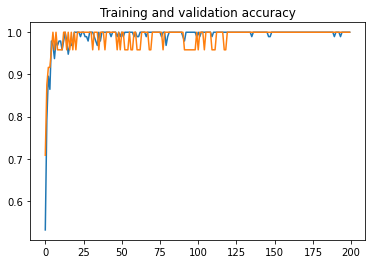

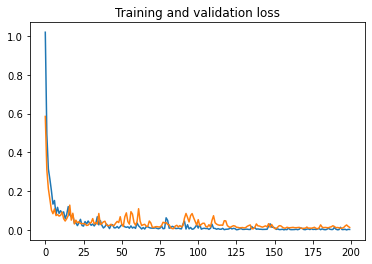

In [21]:


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

